#Here is a simple Python code that demonstrates the basic structure of a CNN using only NumPy:

In [11]:
import numpy as np

# Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Fully connected layer
def fully_connected_layer(x, weights, bias):
    return np.dot(weights, x) + bias

# Convolution function
def conv2D(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

# ReLU Activation function
def relu(x):
    return np.maximum(0, x)

# Max-pooling function
def max_pool(image, pool_size):
    image_height, image_width = image.shape

    output_height = image_height // pool_size
    output_width = image_width // pool_size
    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.max(image[y*pool_size:y*pool_size+pool_size, x*pool_size:x*pool_size+pool_size])

    return output

# Example input image (5x5)
input_image = np.array([[1, 0, 2, 3, 4],
                        [4, 6, 1, 1, 0],
                        [1, 4, 0, 2, 3],
                        [2, 1, 2, 0, 1],
                        [1, 4, 0,1, 2]])


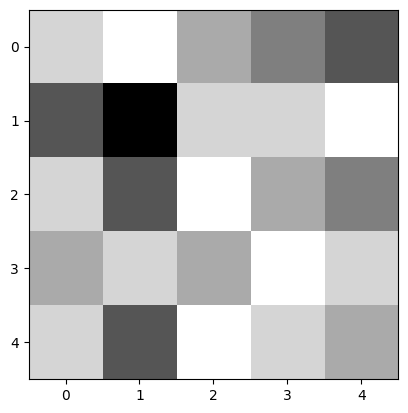

In [2]:
import matplotlib.pyplot as plt
plt.imshow(input_image, cmap = plt.cm.binary)
plt.show()

###Example kernel (3x3)

In [12]:
kernel = np.array([[1, -1, 0],
                  [0, 1, 1],
                  [1, 0, -1]])

###Apply convolution

In [13]:
conv_output = conv2D(input_image, kernel)
print("Convolution Output:")
print(conv_output)

Convolution Output:
[[ 9.  2. -3.]
 [ 2.  8.  6.]
 [ 1.  9. -3.]]


###Apply ReLU activation

In [4]:
relu_output = relu(conv_output)
print("\nReLU Output:")
print(relu_output)


ReLU Output:
[[9. 2. 0.]
 [2. 8. 6.]
 [1. 9. 0.]]


###Apply max-pooling

In [5]:
pool_output = max_pool(relu_output, 2)
print("\nMax-pooling Output:")
print(pool_output)


Max-pooling Output:
[[9.]]


###Let's expand the previous example to include fully connected layers and a softmax layer for classification.

In [15]:
# Flatten the pooled output
flattened_output = pool_output.flatten()

# Define the weights and bias for the fully connected layer
# Here, we assume an output size of 3 for illustration purposes
weights = np.random.randn(3, flattened_output.size)
bias = np.random.randn(3)

# Apply the fully connected layer
fc_output = fully_connected_layer(flattened_output, weights, bias)

# Apply the softmax function for classification
softmax_output = softmax(fc_output)

# Display softmax output as percentages
softmax_percentages = softmax_output * 100

# Round the percentages to 2 decimal places
softmax_percentages_rounded = np.round(softmax_percentages, 2)

print("Softmax Output as Percentages:")
print(softmax_percentages_rounded)


Softmax Output as Percentages:
[37.22 62.64  0.14]


#Simple CNN example with Tensorflow and Keras

###Loading our data

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add a channel dimension (1 for grayscale images)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


###Model

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 67s 69ms/step - loss: 0.1810 - accuracy: 0.9446
Epoch 2/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0360 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 62s 67ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0220 - accuracy: 0.9929


###Accuracy

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0320 - accuracy: 0.9896
Test accuracy: 0.9896000027656555
